In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dt=pd.read_csv("delivery_time.csv")
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
dt.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

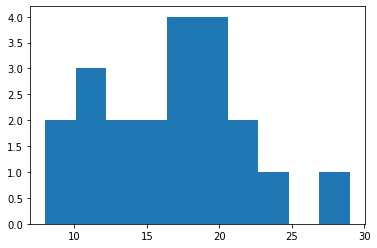

In [25]:
plt.hist(dt["DeliveryTime"])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

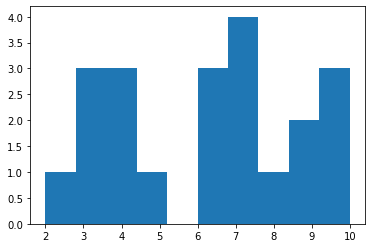

In [26]:
plt.hist(dt["SortingTime"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2fd2de50>,
 'caps': [<matplotlib.lines.Line2D at 0x2fd3b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2fd2daf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2fd3bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2fd3bf10>],
 'means': []}

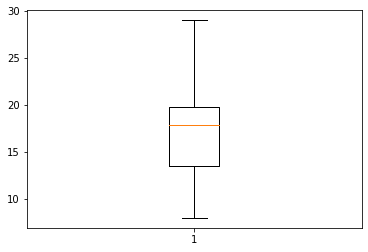

In [27]:
plt.boxplot(dt["DeliveryTime"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2fd86d60>,
 'caps': [<matplotlib.lines.Line2D at 0x2fd93460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2fd86a00>],
 'medians': [<matplotlib.lines.Line2D at 0x2fd93b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2fd93e80>],
 'means': []}

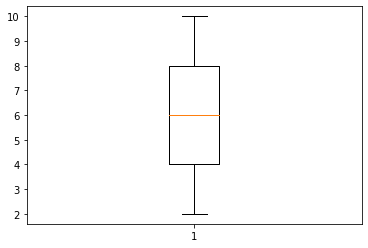

In [28]:
plt.boxplot(dt["SortingTime"])

In [29]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [36]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=dt).fit()
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        16:09:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [52]:
pred=model.predict(dt.iloc[:,:])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [53]:
rmse_lin = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred))**2))
rmse_lin 

2.791650327061766

Text(0, 0.5, 'Dt')

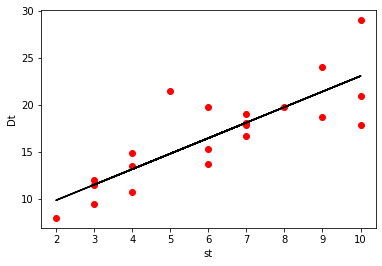

In [46]:
import matplotlib.pylab as plt
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='red')
plt.plot(dt['SortingTime'],pred,color='black')
plt.xlabel('st')
plt.ylabel('Dt')

In [61]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=dt).fit()
model2.params


Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64

In [54]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.64e-06
Time:                        16:22:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
pred2=model2.predict(dt.iloc[:,:])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [59]:
rmse_lin = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred2))**2))
rmse_lin 

2.7331714766820663

Text(0, 0.5, 'Dt')

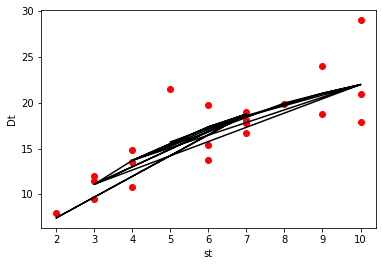

In [62]:
import matplotlib.pylab as plt
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='red')
plt.plot(dt['SortingTime'],pred2,color='black')
plt.xlabel('st')
plt.ylabel('Dt')

In [67]:
model3 = smf.ols('DeliveryTime~np.sqrt(SortingTime)',data=dt).fit()
model3.params

Intercept              -2.518837
np.sqrt(SortingTime)    7.936591
dtype: float64

In [70]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.61e-06
Time:                        16:30:22   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(SortingTime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
pred3=model.predict(dt.iloc[:,:])
pred3

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [109]:
rmse_lin = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred3))**2))
rmse_lin 

2.7315432100912105

In [110]:
model3.resid 
model3.resid_pearson 


array([-0.54979987,  0.05072065,  0.98486155,  0.94336205,  2.23599456,
       -0.54732539,  0.18128252, -0.60164169, -1.62929521, -0.88481554,
       -0.03455498, -0.90689618, -0.62659787,  0.09480692,  0.2793658 ,
        0.53127019, -1.10448427, -0.12863711, -0.24556697, -0.22613992,
        2.18409075])

In [ ]:
#model 3 has higher adjusted r square value and least rmse so model 3 is the best model

In [78]:
sh=pd.read_csv("Salary_Data.csv")
sh

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [85]:
import statsmodels.formula.api as smf
modela=smf.ols("Salary~YearsExperience",data=sh).fit()
modela.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [88]:
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        16:39:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
preda=modela.predict(sh.iloc[:,:])
preda

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [93]:
rmse_lin = np.sqrt(np.mean((np.array(sh['Salary'])-np.array(preda))**2))
rmse_lin 

5592.043608760662

In [111]:
modela.resid 
modela.resid_pearson 


array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [96]:
modelb = smf.ols('Salary~np.log(YearsExperience)',data=sh).fit()
modelb.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [102]:
modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           3.25e-13
Time:                        16:44:37   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
modelc = smf.ols('Salary~np.sqrt(YearsExperience)',data=sh).fit()
modelc.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [103]:
modelc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           8.57e-18
Time:                        16:44:51   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
predb=modelb.predict(sh.iloc[:,:])
predb

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [107]:
predc=modelc.predict(sh.iloc[:,:])
predc

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

In [105]:
rmse_lin = np.sqrt(np.mean((np.array(sh['Salary'])-np.array(predb))**2))
rmse_lin 

10302.893706228304

In [108]:
rmse_lin = np.sqrt(np.mean((np.array(sh['Salary'])-np.array(predc))**2))
rmse_lin 

7080.095734983039

In [ ]:
#adjusted r square value is higher and rmse value is lower for  model a so model a is the best model